[*********************100%***********************]  1 of 1 completed
00:43:40 - cmdstanpy - INFO - Chain [1] start processing
00:43:42 - cmdstanpy - INFO - Chain [1] done processing


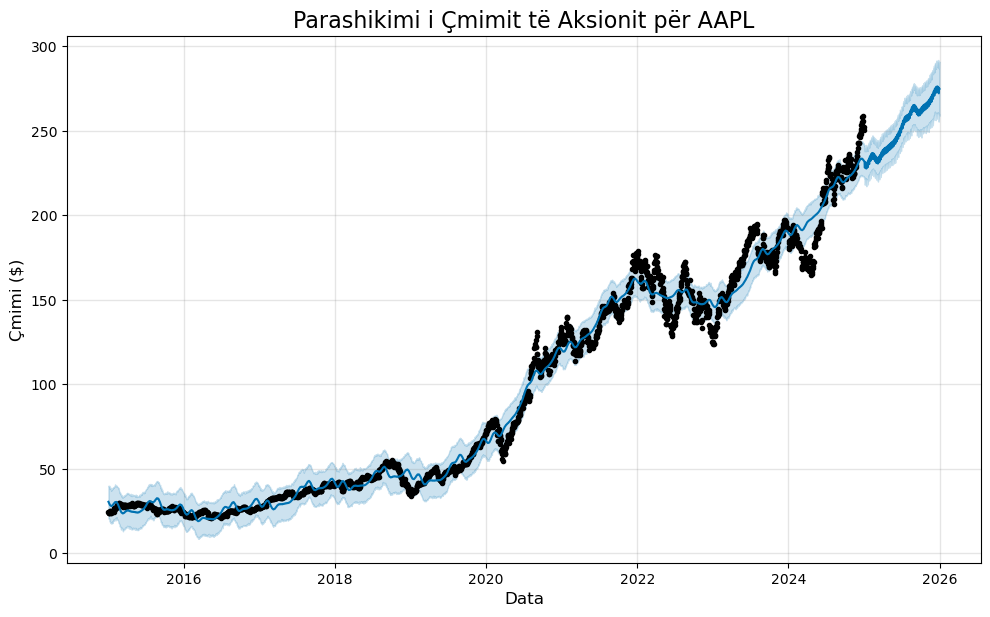

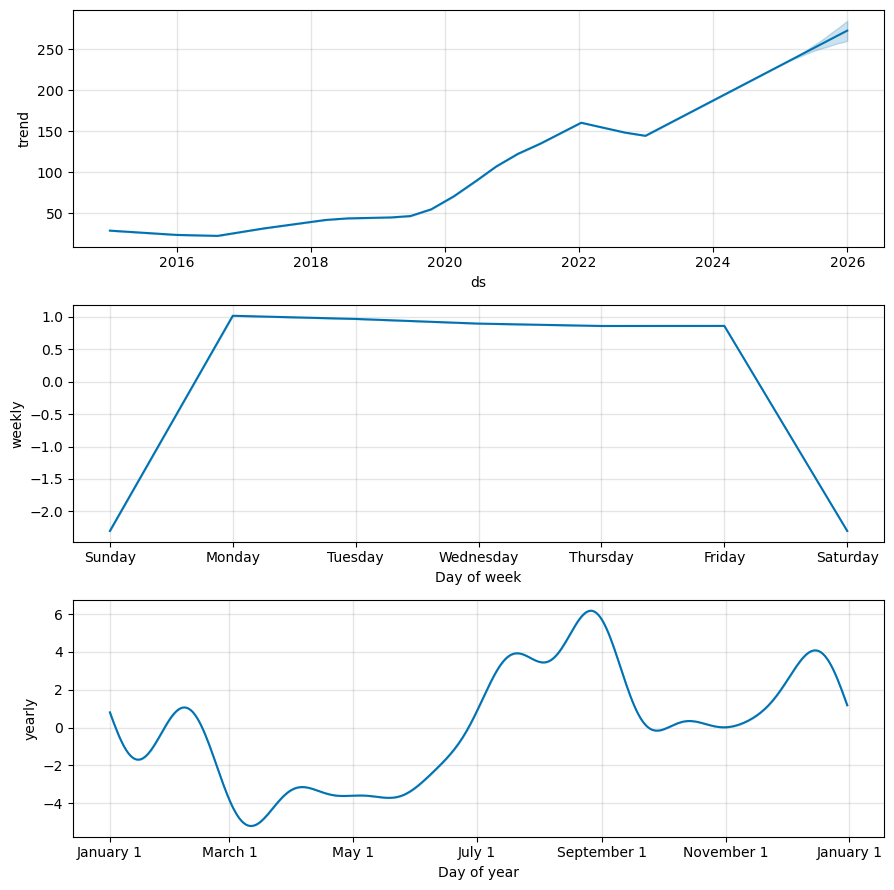

Parashikimet jane ruajtur në skedarin 'AAPL_forecast.csv'.


In [1]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt

stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2015-01-01", end="2025-01-01")

data.reset_index(inplace=True)
data_for_prophet = pd.DataFrame({
    'ds': data['Date'].values,  
    'y': data['Close'].values.flatten()
})
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

model = Prophet()
model.fit(data_for_prophet)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title(f"Parashikimi i Çmimit të Aksionit për {stock_symbol}", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Çmimi ($)", fontsize=12)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f"{stock_symbol}_forecast.csv", index=False)

print(f"Parashikimet jane ruajtur në skedarin '{stock_symbol}_forecast.csv'.")


In [2]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 4.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/13.3 MB 5.8 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/13.3 MB 5.6 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 5.7 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 5.7 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------- ----------- 9.4/13.3 MB 5.8 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 5.7 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 5.5 MB/s eta 0:00:00
  